In [ ]:
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
import requests
from sklearn.linear_model import LinearRegression as linreg
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ssga = "https://www.ssga.com/us/en/individual/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx"
spy_listings = list(pd.read_excel(ssga, header=4).Ticker.dropna())
data = yf.download(spy_listings, period="10y")
data = data.dropna(how="all", axis=1)
tickers = list(data['Close'])

YF.download() has changed argument auto_adjust default to True


[********************* 44%                       ]  223 of 505 completedERROR:yfinance:Failed to get ticker 'LUV' reason: Failed to perform, curl: (28) Connection timed out after 10002 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[**********************73%**********             ]  371 of 505 completedERROR:yfinance:Failed to get ticker 'ECL' reason: Failed to perform, curl: (28) Connection timed out after 10002 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[*********************100%***********************]  505 of 505 completed
ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (period=10y)')
ERROR:yfinance:['-', 'BRK.B']: YFPricesMissingError('possibly delisted; no price data found  (period=10y) (Yahoo error = "No data found, symbol may be delisted")')


In [ ]:
# prompt: count the number of nans in the dataframe data
data.isnull().sum().sum()

# prompt: code that removes all nans files across the axis
data = data.dropna(axis=0)

#check wuill confirm all nans are removed
data.isnull().sum().sum()

np.int64(0)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166 entries, 2024-09-24 to 2025-05-22
Columns: 2510 entries, ('Close', 'A') to ('Volume', 'ZTS')
dtypes: float64(2042), int64(468)
memory usage: 3.2 MB
None
Price            Close                                                  \
Ticker               A        AAPL        ABBV        ABNB         ABT   
Date                                                                     
2024-09-24  141.083450  226.573547  188.442017  131.479996  111.702019   
2024-09-25  138.666931  225.577057  186.250931  130.710007  110.982567   
2024-09-26  145.926453  226.723038  186.874161  129.250000  111.100845   
2024-09-27  147.239136  226.992081  189.688477  128.250000  110.805168   
2024-09-30  147.656799  232.183853  192.308014  126.809998  112.362343   

Price                                                                  ...  \
Ticker            ACGL         ACN        ADBE         ADI        ADM  ...   
Date                                     

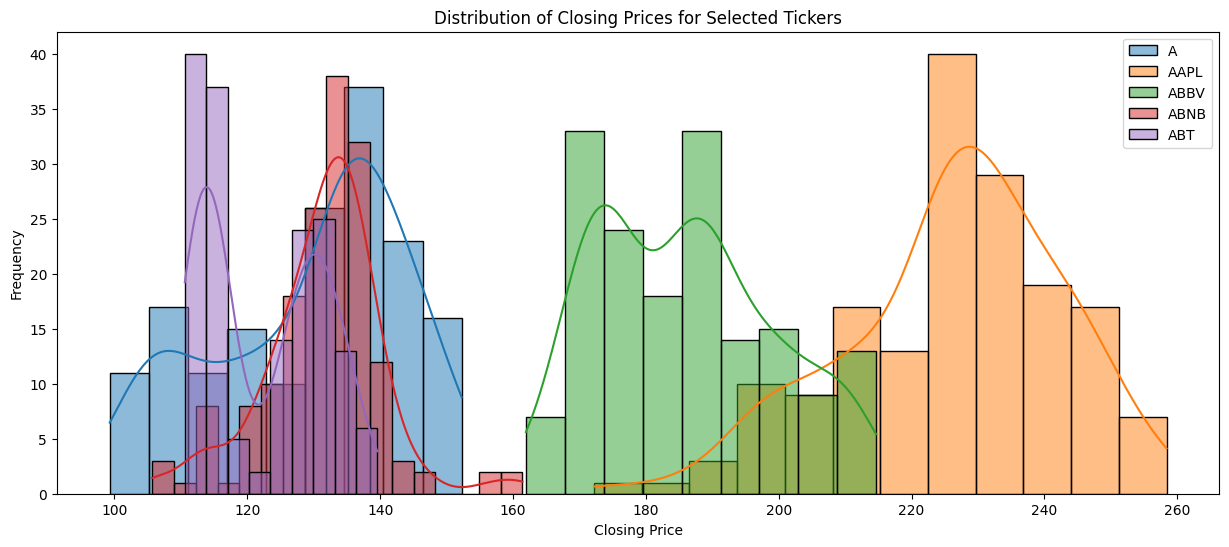

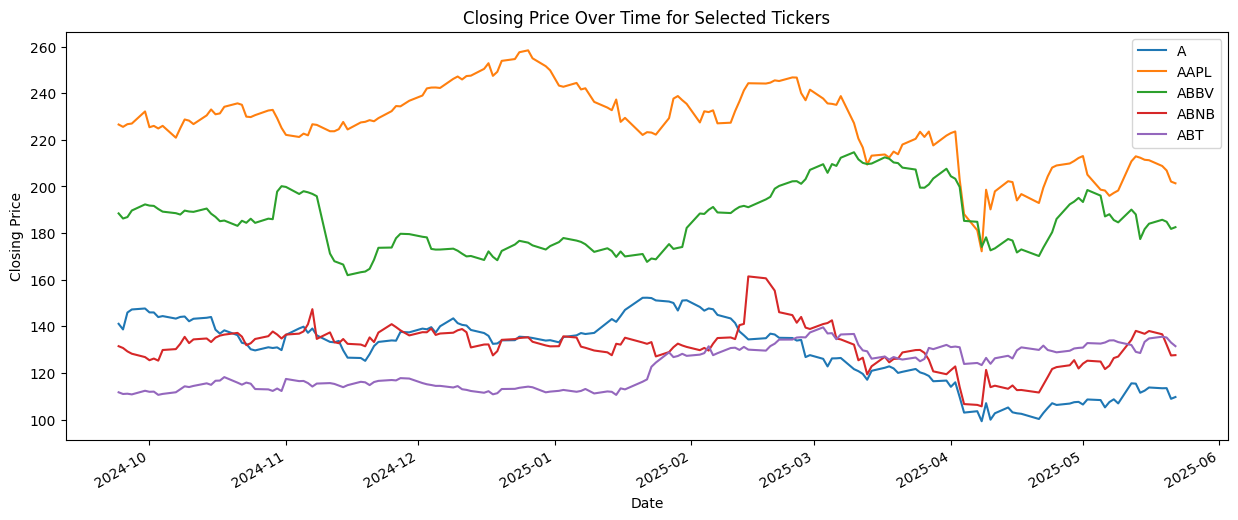

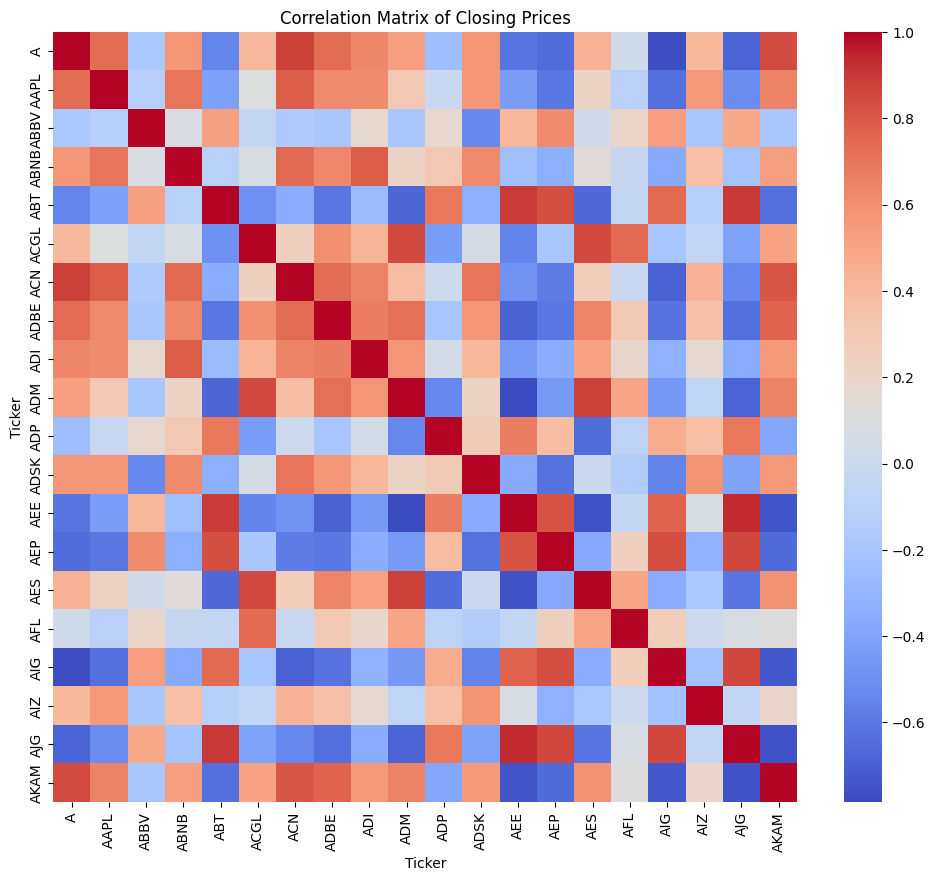

In [ ]:
# prompt: create code that conducts an exploratory data analysis for 'data'

# Display basic information about the DataFrame
print(data.info())

# Display the first few rows of the DataFrame
print(data.head())

# Display descriptive statistics for numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of a few selected columns (e.g., 'Close' for the first 5 tickers)
if len(tickers) > 0:
  plt.figure(figsize=(15, 6))
  for i in range(min(5, len(tickers))):
      sns.histplot(data['Close'][tickers[i]].dropna(), kde=True, label=tickers[i])
  plt.title('Distribution of Closing Prices for Selected Tickers')
  plt.xlabel('Closing Price')
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

# Plot the time series data for 'Close' price of a few selected tickers
if len(tickers) > 0:
  plt.figure(figsize=(15, 6))
  for i in range(min(5, len(tickers))):
      data['Close'][tickers[i]].plot(label=tickers[i])
  plt.title('Closing Price Over Time for Selected Tickers')
  plt.xlabel('Date')
  plt.ylabel('Closing Price')
  plt.legend()
  plt.show()

# Calculate and visualize the correlation matrix for 'Close' prices of a few selected tickers
if len(tickers) > 1:
  plt.figure(figsize=(12, 10))
  selected_tickers_close = data['Close'][tickers[:min(20, len(tickers))]].dropna(axis=1) # Limit to 20 for readability
  sns.heatmap(selected_tickers_close.corr(), annot=False, cmap='coolwarm')
  plt.title('Correlation Matrix of Closing Prices')
  plt.show()

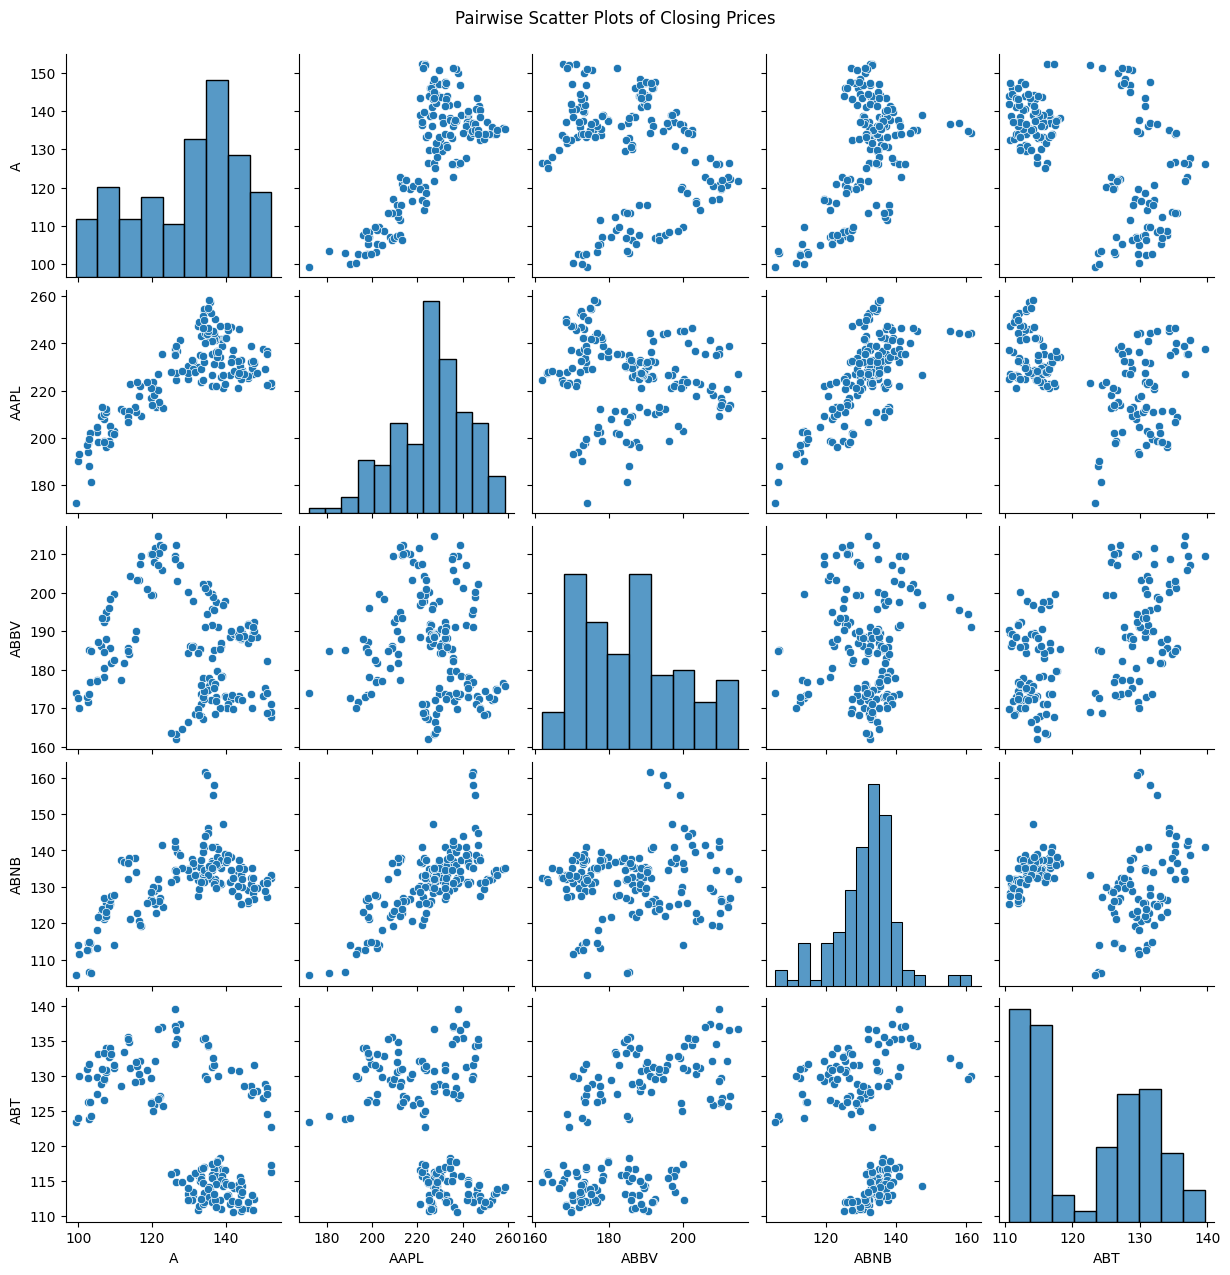

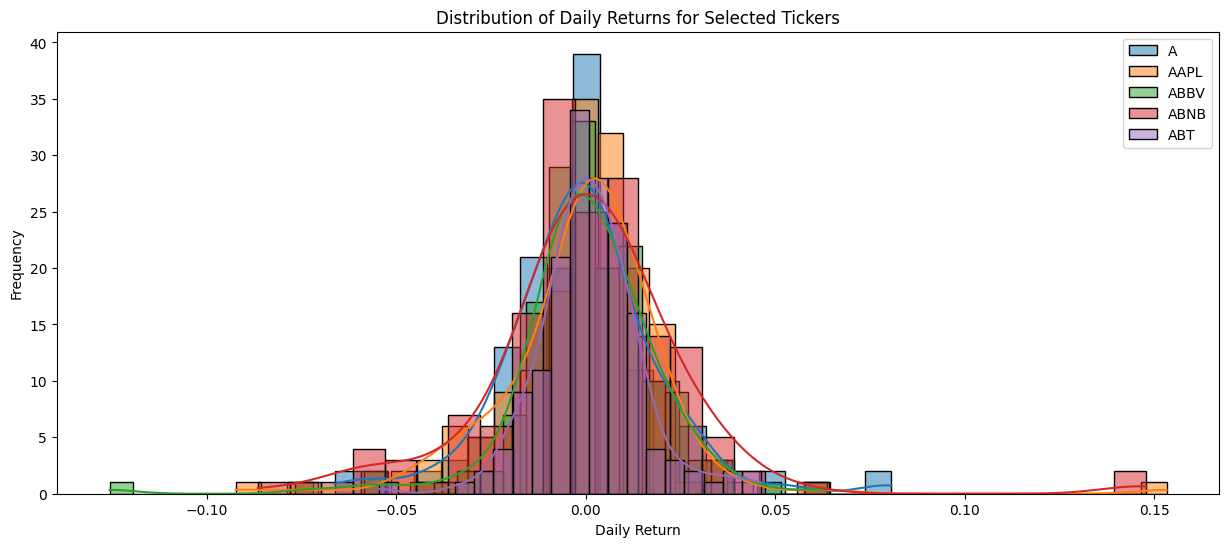

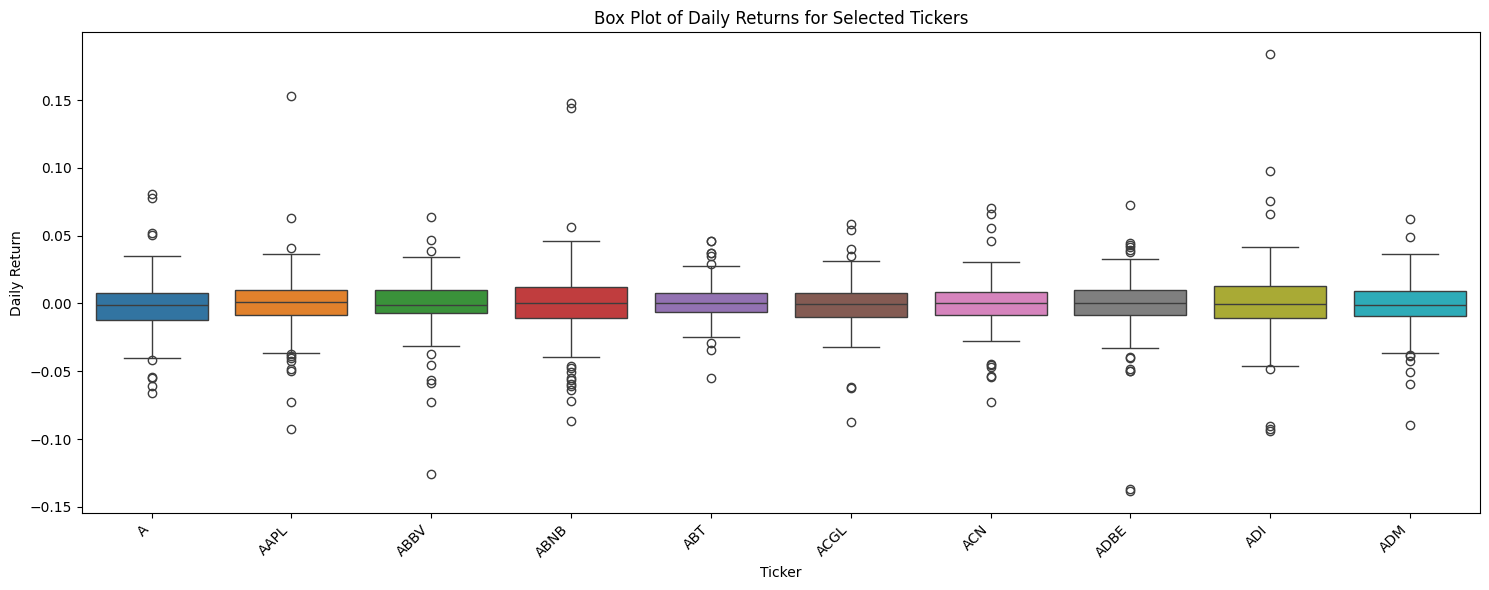

<Figure size 1500x600 with 0 Axes>

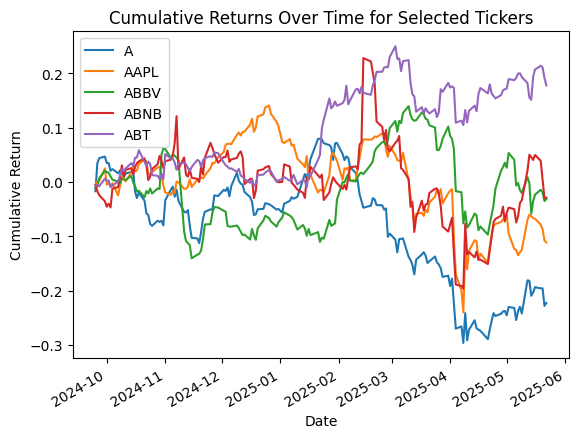

In [ ]:
# prompt: any more eda assessments

# Calculate and visualize pairwise relationships using scatter plots for 'Close' prices of a few selected tickers
if len(tickers) > 1:
  selected_tickers_close = data['Close'][tickers[:min(5, len(tickers))]].dropna(axis=1) # Limit to 5 for readability
  sns.pairplot(selected_tickers_close)
  plt.suptitle('Pairwise Scatter Plots of Closing Prices', y=1.02)
  plt.show()

# Calculate daily returns and visualize their distribution for a few selected tickers
if len(tickers) > 0:
  daily_returns = data['Close'][tickers[:min(5, len(tickers))]].pct_change().dropna()
  plt.figure(figsize=(15, 6))
  for col in daily_returns.columns:
      sns.histplot(daily_returns[col], kde=True, label=col)
  plt.title('Distribution of Daily Returns for Selected Tickers')
  plt.xlabel('Daily Return')
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

# Visualize box plots of daily returns for a few selected tickers to compare distributions
if len(tickers) > 0:
    daily_returns = data['Close'][tickers[:min(10, len(tickers))]].pct_change().dropna() # Limit to 10 for readability
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=daily_returns)
    plt.title('Box Plot of Daily Returns for Selected Tickers')
    plt.ylabel('Daily Return')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Calculate and visualize the cumulative returns for a few selected tickers
if len(tickers) > 0:
    cumulative_returns = (1 + data['Close'][tickers[:min(5, len(tickers))]].pct_change().dropna()).cumprod() - 1
    plt.figure(figsize=(15, 6))
    cumulative_returns.plot()
    plt.title('Cumulative Returns Over Time for Selected Tickers')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.show()